---
## 1. Explora el dataset CIFAR-10

In [2]:
# Carga cifar10 desde keras.datasets.
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data() # carga el dataset cifar10

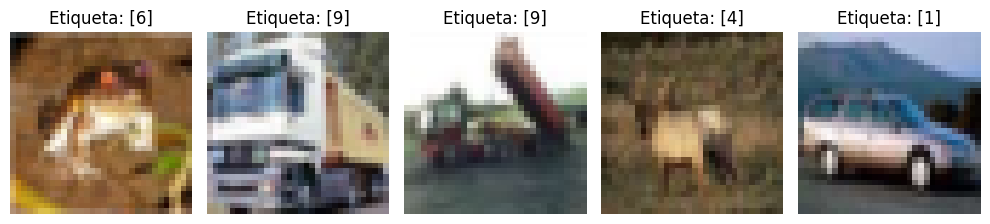

In [3]:
# Muestra 5 imágenes de ejemplo con sus etiquetas
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))

# bucle que muestra 5 imagenes y sus etiquetas en una fila
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**Investiga la forma y el rango de valores de los píxeles.**

En el sitio web de la libreria [cifar10](https://www.cs.toronto.edu/~kriz/cifar.html) aparece 32x32 a color
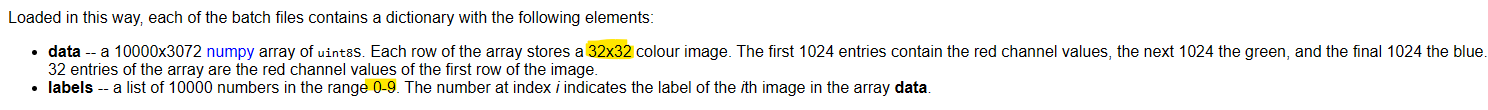

**¿Cuántas clases tiene el dataset?**

En el sitio web Tambien lo explica tiene de 0 a 9 clases (10 en total)
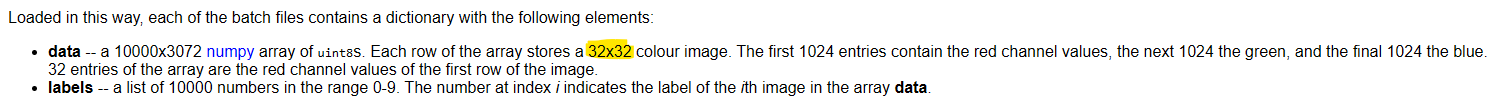
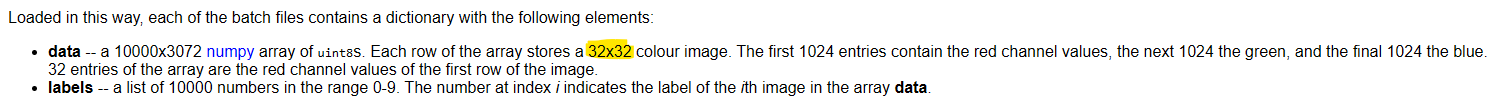

---
## 2. Normaliza y codifica etiquetas

In [4]:
#Convierte las imágenes de CIFAR-10 a flotantes y normalízalas a [0,1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

In [5]:
#Aplica to_categorical a las etiquetas para una red multicategoría.
from tensorflow.keras.utils import to_categorical

# Convetir etiquetas a one-hot para mas presicion
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Ejemplo
print("Etiqueta original:", y_train[0])
print("Etiqueta codificada:", y_train_cat[0])

Etiqueta original: [6]
Etiqueta codificada: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# 3. Crea tu primera CNN para CIFAR-10

In [7]:
# Crea una CNN con:

# 1 capa Conv2 = extrae características
# 1 MaxPooling2D = resumir características.
# 1 Flatten = aplana la img 2D en un vector 1D
# 1 Dense (oculta)
# 1 Dense de salida con softmax

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# modelo Convolutional Neural Network CIFAR-10
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # salida de 10 clases
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         460,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 462,410 (1.76 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Entrénala 5 épocas y evalúala

# entrenar por 5 épocas
history = model.fit(x_train, y_train_cat, epochs=5,
                    batch_size=64, validation_split=0.2)

# evaluar el modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)

print(f"Pérdida en test: {test_loss:.4f}") # imprimir perdida
print(f"Precisión en test: {test_accuracy:.4f}") # imprimir precisión

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6213 - loss: 1.0851 - val_accuracy: 0.5935 - val_loss: 1.1672
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6386 - loss: 1.0392 - val_accuracy: 0.6099 - val_loss: 1.1308
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6586 - loss: 0.9838 - val_accuracy: 0.6166 - val_loss: 1.1051
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6730 - loss: 0.9499 - val_accuracy: 0.6086 - val_loss: 1.1315
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6780 - loss: 0.9331 - val_accuracy: 0.6194 - val_loss: 1.1079
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6203 - loss: 1.0778
Pérdida en test: 1.0993
Precisión en test: 0.6174


# 4. Clasificación de ropa con Fashion MNIST

In [10]:
# Usa fashion_mnist desde keras.datasets.

from tensorflow.keras.datasets import fashion_mnist

(x_train_f, y_train_f), (x_test_f, y_test_f) = fashion_mnist.load_data()

# mostrar dimensiones
print(f"x_train: {x_train_f.shape}, x_test: {x_test_f.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train: (60000, 28, 28), x_test: (10000, 28, 28)


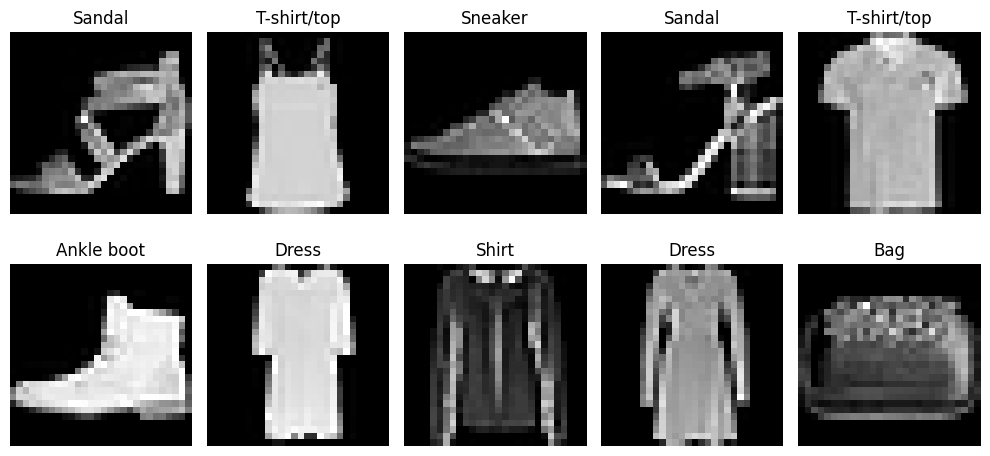

In [11]:
# Muestra 10 imágenes aleatorias con sus nombres (ej: "sneaker", "shirt"

# diccionario con las clases fashion mnist 
fashion_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# 10 índices aleatorios
indices = np.random.randint(0, x_train_f.shape[0], 10)

# mostrar las 10 imagenes en 2 filas
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_f[idx], cmap='gray')
    plt.title(fashion_labels[y_train_f[idx]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
# Entrena una CNN básica para clasificar las prendas

# normalizar a [0,1]
x_train_f = x_train_f.astype("float32") / 255.0
x_test_f = x_test_f.astype("float32") / 255.0

# expandir dimensión de (28, 28) → (28, 28, 1 canal)
x_train_f = np.expand_dims(x_train_f, -1)
x_test_f = np.expand_dims(x_test_f, -1)

# categorizar etiquetas
y_train_f_cat = to_categorical(y_train_f, 10)
y_test_f_cat = to_categorical(y_test_f, 10)

# modelo CNN Fashion MNIST
model_f = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# compilar
model_f.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# entrenar 
model_f.fit(x_train_f, y_train_f_cat, epochs=5,
            batch_size=64, validation_split=0.2)

# evaluar
loss_f, acc_f = model_f.evaluate(x_test_f, y_test_f_cat)
print(f"Pérdida en test: {loss_f:.4f}") # imprimir perdida
print(f"Precisión en test: {acc_f:.4f}") # imprimir precision

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7779 - loss: 0.6379 - val_accuracy: 0.8767 - val_loss: 0.3474
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8885 - loss: 0.3133 - val_accuracy: 0.8932 - val_loss: 0.3001
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9057 - loss: 0.2652 - val_accuracy: 0.9062 - val_loss: 0.2720
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9170 - loss: 0.2290 - val_accuracy: 0.9062 - val_loss: 0.2601
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9279 - loss: 0.2038 - val_accuracy: 0.9095 - val_loss: 0.2534
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9047 - loss: 0.2725
Pérdida en test: 0.2695
Precisión en test: 0.9030


# 5. Cambia la arquitectura y compara

In [13]:
# Toma el modelo de CIFAR-10 y agrega una segunda capa convolucional.

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Agregar segunda capa convolucional adicional
    Conv2D(64, (3, 3), activation='relu'), # segunda capa
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history = model.fit(x_train, y_train_cat, epochs=5,
                      batch_size=64, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Pérdida en test: {test_loss:.4f}")
print(f"Precisión en test: {test_acc:.4f}")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3916 - loss: 1.6845 - val_accuracy: 0.5674 - val_loss: 1.2303
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6150 - loss: 1.0912 - val_accuracy: 0.6330 - val_loss: 1.0496
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6849 - loss: 0.9048 - val_accuracy: 0.6650 - val_loss: 0.9818
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7259 - loss: 0.7910 - val_accuracy: 0.6801 - val_loss: 0.9412
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7632 - loss: 0.6889 - val_accuracy: 0.6796 - val_loss: 0.9689
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6755 - loss: 0.9687
Pérdida en test: 0.9792
Precisión en test: 0.6745


### Compara la precisión antes y después del cambio.

El modelo del dataset CIFAR-10
* Antes (1 capa Conv2D)	0.6174 (61.74%)
* Después (2 capas Conv2D)	0.6745 (67.45%)

# 6. Evalúa el modelo con una matriz de confusión

In [14]:
# Usa sklearn.metrics.confusion_matrix.
# Aplica argmax a las salidas y etiquetas.

from sklearn.metrics import confusion_matrix
import seaborn as sns

# obtener las predicciones del modelo
y_pred_prob = model.predict(x_test)

# convertir predicciones one-hot a etiquetas (mayor probabilidad)
y_pred = np.argmax(y_pred_prob, axis=1)

# revertir el one-hot y recuperar etiquetas originales
y_true = np.argmax(y_test_cat, axis=1)

# calcular matriz de confusión
cm = confusion_matrix(y_true, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


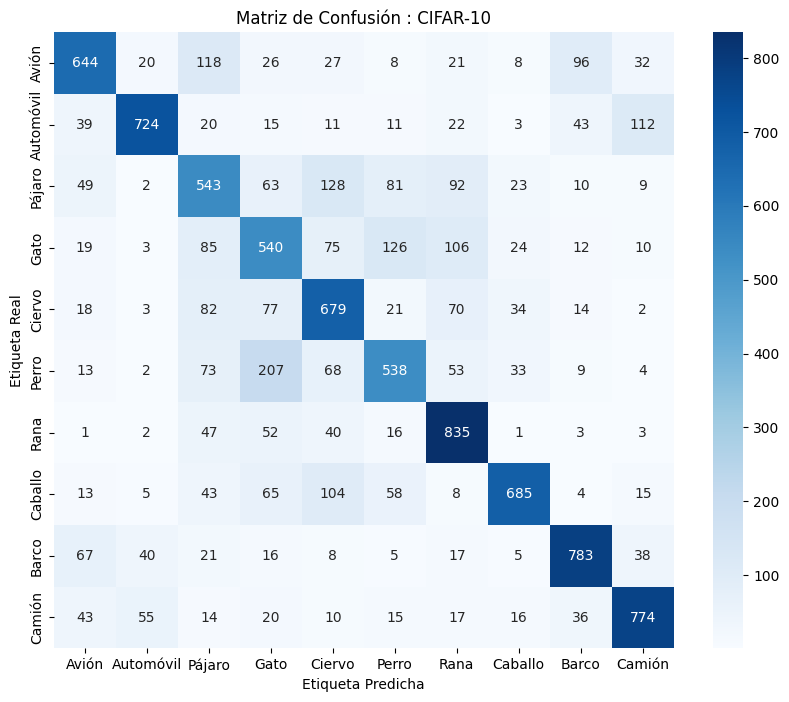

In [15]:
# Visualiza la matriz con seaborn.heatmap

# nombrar de clases cifar-10
class_names = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

# visualizar matriz de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión : CIFAR-10')
plt.show()

# 7. Aumenta el número de épocas

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


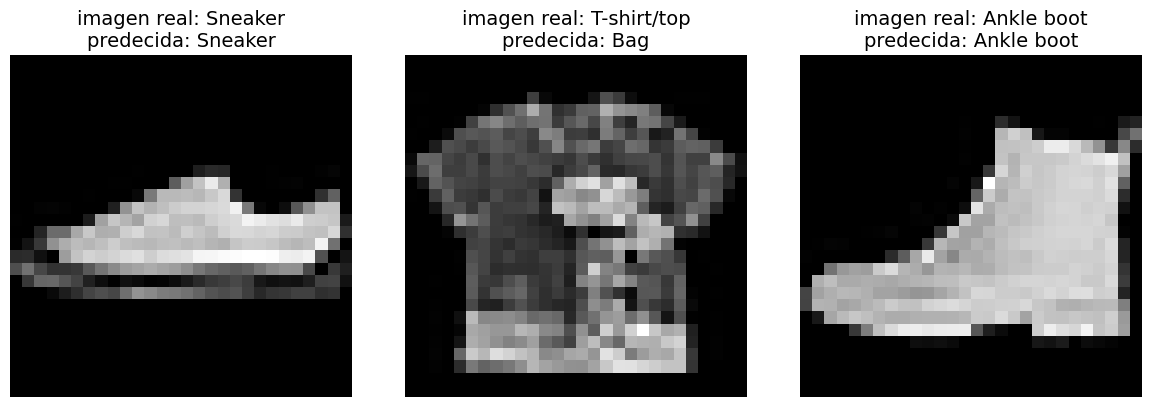

In [20]:
# Usa el modelo de Fashion MNIST.

import random

# Predecir etiquetas
y_pred_prob_f = model_f.predict(x_test_f)
y_pred_f = np.argmax(y_pred_prob_f, axis=1)

plt.figure(figsize=(12, 4))

for i in range(3):
    # indice aleatorio
    idx = random.randint(0, len(x_test_f) - 1)
    
    # obtener imagenes y etiquetas
    img = x_test_f[idx].reshape(28, 28)
    true_label = fashion_labels[y_test_f[idx]]
    pred_label = fashion_labels[y_pred_f[idx]]
    
    # ajustar imagenes y etiquetas
    plt.subplot(1, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"imagen real: {true_label}\npredecida: {pred_label}", fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [21]:
# Entrena con 20 épocas

# Entrenamiento 
history_f = model_f.fit(
    x_train_f, y_train_f_cat,
    epochs=20, # 20 épocas
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9317 - loss: 0.1866 - val_accuracy: 0.9068 - val_loss: 0.2607
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9380 - loss: 0.1690 - val_accuracy: 0.9128 - val_loss: 0.2537
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9481 - loss: 0.1486 - val_accuracy: 0.9032 - val_loss: 0.2901
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9479 - loss: 0.1440 - val_accuracy: 0.9133 - val_loss: 0.2545
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9560 - loss: 0.1233 - val_accuracy: 0.9163 - val_loss: 0.2620
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9615 - loss: 0.1050 - val_accuracy: 0.9120 - val_loss: 0.2772
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9647 - loss: 0.1003 - val_accuracy: 0.9147 - val_loss: 0.2828
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9690 - loss: 0.0850 - val_accuracy: 0.

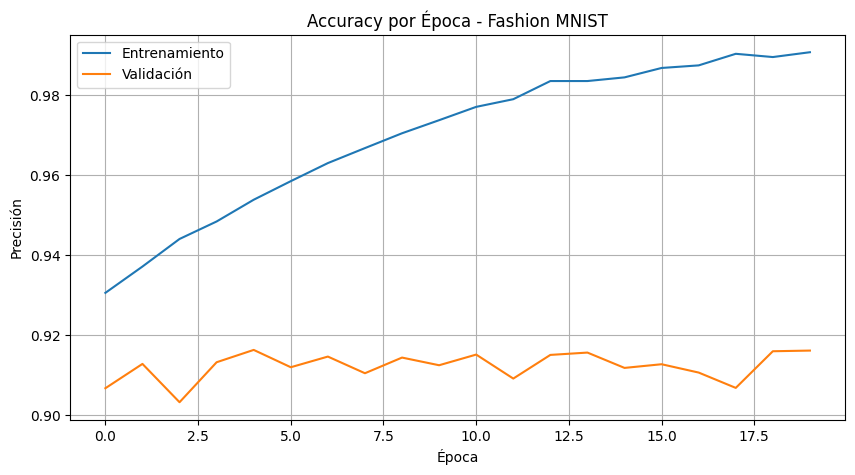

In [22]:
# Guarda en una lista el accuracy de cada época y gráficalo

# accuracy por época
train_accuracy = history_f.history['accuracy']
val_accuracy = history_f.history['val_accuracy']

# gráfico
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Entrenamiento')
plt.plot(val_accuracy, label='Validación')
plt.title('Accuracy por Época - Fashion MNIST')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

# 8. Agrega Dropout a tu modelo (Investiga qué es Dropuot, explicalo con tus palabras y luego resuelve)

### Es abandonar/ignorar una porcion de neuronas aleatorias durante el entrenamiento, esto se hace para evitar el sobreajuste, esto hara que las neuronas dependan menos unas de otras.

In [23]:
# Inserta una capa Dropout(0.3) entre capas densas.

from tensorflow.keras.layers import Dropout

# Modelo Fashion Mist con Dropout
model_f_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),  # dropout entre las capas densas
    Dense(10, activation='softmax')
])

model_f_dropout.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Entrenamiento con Dropout:
history_dropout = model_f_dropout.fit(
    x_train_f, y_train_f_cat,
    epochs=20,
    batch_size=64,
    validation_split=0.2
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7316 - loss: 0.7796 - val_accuracy: 0.8776 - val_loss: 0.3475
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8673 - loss: 0.3840 - val_accuracy: 0.8899 - val_loss: 0.3022
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8899 - loss: 0.3169 - val_accuracy: 0.8995 - val_loss: 0.2794
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8946 - loss: 0.2908 - val_accuracy: 0.8992 - val_loss: 0.2782
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9038 - loss: 0.2688 - val_accuracy: 0.9096 - val_loss: 0.2563
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9107 - loss: 0.2485 - val_accuracy: 0.9105 - val_loss: 0.2594
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9133 - loss: 0.2348 - val_accuracy: 0.9082 - val_loss: 0.2546
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9213 - loss: 0.2154 - val_accuracy: 0.

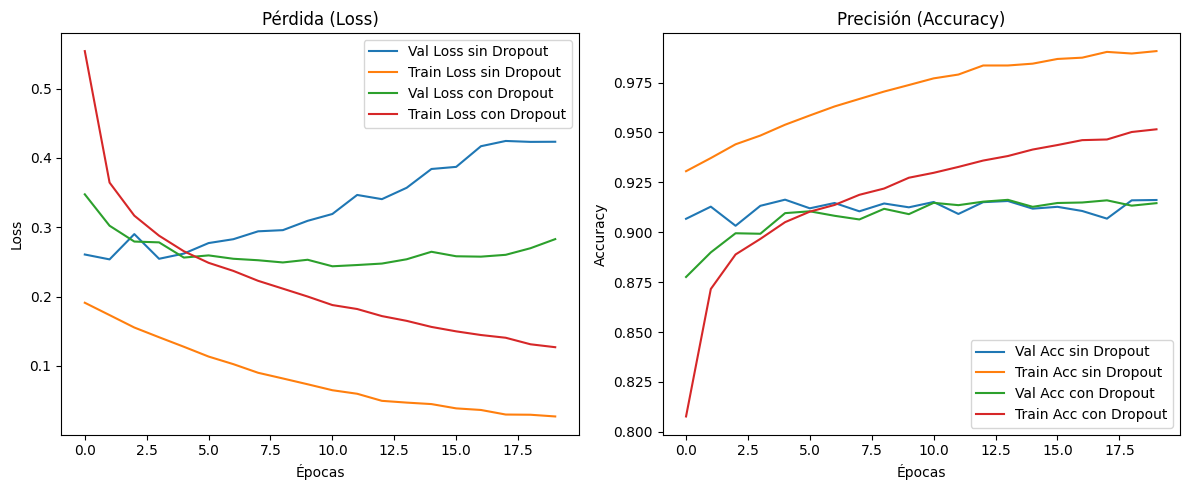

In [24]:
# Compara el sobreajuste antes y después con gráficos

# Pérdida
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_f.history['val_loss'], label='Val Loss sin Dropout')
plt.plot(history_f.history['loss'], label='Train Loss sin Dropout')
plt.plot(history_dropout.history['val_loss'], label='Val Loss con Dropout')
plt.plot(history_dropout.history['loss'], label='Train Loss con Dropout')
plt.title('Pérdida (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Precisión
plt.subplot(1,2,2)
plt.plot(history_f.history['val_accuracy'], label='Val Acc sin Dropout')
plt.plot(history_f.history['accuracy'], label='Train Acc sin Dropout')
plt.plot(history_dropout.history['val_accuracy'], label='Val Acc con Dropout')
plt.plot(history_dropout.history['accuracy'], label='Train Acc con Dropout')
plt.title('Precisión (Accuracy)')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 9. Cambia el tamaño del batch

### Lo tengo que volver a cargar todo por que sino se me buguea

In [39]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import time

# Cargar datos CIFAR-10 (de nuevo, para estar seguros)
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

# Preprocesamiento
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0
y_train_cifar_cat = to_categorical(y_train_cifar, 10)
y_test_cifar_cat = to_categorical(y_test_cifar, 10)

# ---------- Entrenamiento con batch_size=16 ----------
model_16 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_16.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

start_time_16 = time.time()
history_16 = model_16.fit(x_train_cifar, y_train_cifar_cat, epochs=5,
                          batch_size=16, validation_split=0.2)
time_16 = time.time() - start_time_16

loss_16, acc_16 = model_16.evaluate(x_test_cifar, y_test_cifar_cat, verbose=0)

print(f"\nBatch size = 16")
print(f"Tiempo de entrenamiento: {time_16:.2f} segundos")
print(f"Precisión en test: {acc_16:.4f}")

# ---------- Entrenamiento con batch_size=64 ----------
model_64 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_64.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

start_time_64 = time.time()
history_64 = model_64.fit(x_train_cifar, y_train_cifar_cat, epochs=5,
                          batch_size=64, validation_split=0.2)
time_64 = time.time() - start_time_64

loss_64, acc_64 = model_64.evaluate(x_test_cifar, y_test_cifar_cat, verbose=0)

print(f"\nBatch size = 64")
print(f"Tiempo de entrenamiento: {time_64:.2f} segundos")
print(f"Precisión en test: {acc_64:.4f}")


Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.4251 - loss: 1.5971 - val_accuracy: 0.6199 - val_loss: 1.0975
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6523 - loss: 0.9909 - val_accuracy: 0.6608 - val_loss: 0.9815
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7124 - loss: 0.8319 - val_accuracy: 0.6672 - val_loss: 0.9531
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7586 - loss: 0.6913 - val_accuracy: 0.6713 - val_loss: 1.0021
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8033 - loss: 0.5652 - val_accuracy: 0.6613 - val_loss: 1.0718

Batch size = 16
Tiempo de entrenamiento: 49.75 segundos
Precisión en test: 0.6472
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.3809 - loss: 1.6909 - val_accuracy: 0.5890 - val_loss: 1.1815
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6196 - loss: 1.0863 - val_accuracy: 0.6468 - val_loss: 1.0289
Epoch 3/5
625/625

# 10. Clasificador con aumento de datos (Data Augmentation) Clasificación de rostros con LFW (Labeled Faces in the Wild)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.4184 - loss: 1.4995 - val_accuracy: 0.5023 - val_loss: 1.4031
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4923 - loss: 1.3497 - val_accuracy: 0.5023 - val_loss: 1.4149
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5095 - loss: 1.3265 - val_accuracy: 0.5023 - val_loss: 1.4030
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4772 - loss: 1.3632 - val_accuracy: 0.5023 - val_loss: 1.4031
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4852 - loss: 1.3563 - val_accuracy: 0.5023 - val_loss: 1.4075
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4879 - loss: 1.3600 - val_accuracy: 0.5023 - val_loss: 1.4070
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4607 - loss: 1.3829 - val_accuracy: 0.5023 - val_loss: 1.4041
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4939 - loss: 1.3516 - val_accuracy: 0.5023 - v

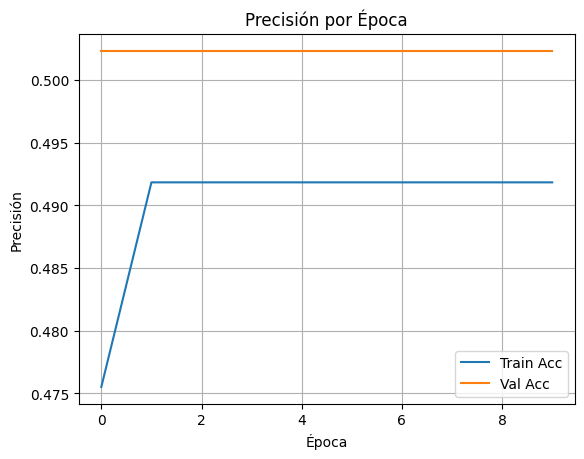

In [40]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# 1. Cargar dataset LFW (solo personas con al menos 70 fotos)
lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.5)  # imagen (62x47), 13 personas

X = lfw.images
y = lfw.target
target_names = lfw.target_names

# 2. Seleccionar solo las primeras 5 personas (clases)
mask = y < 5
X = X[mask]
y = y[mask]

# 3. Normalizar y expandir dimensión del canal
X = X.astype('float32') / 255.0
X = np.expand_dims(X, -1)  # forma (n_samples, 62, 47, 1)

# 4. Etiquetas categóricas
y_cat = to_categorical(y, num_classes=5)

# 5. División train/test
x_train, x_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# 6. ImageDataGenerator para aumento de datos
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# 7. Definir CNN básica
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(62,47,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # 5 personas
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 8. Entrenamiento
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    validation_data=(x_test, y_test),
                    epochs=10)

# 9. Evaluación
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nPrecisión en test: {test_acc:.4f}")

# 10. Graficar accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión por Época')
plt.legend()
plt.grid(True)
plt.show()
